# Upload Data

In [1]:
import pandas as pd
from pandas import DataFrame, Series

import ipywidgets as widgets
from ipywidgets import *

import matplotlib.pyplot as plt
import numpy as np

In [2]:
DF = pd.read_csv('US-Engineering-Profiles.csv',index_col=0)
ethnicities = list(DF.columns)[6:-1]

### Create Functions to Classify Data

In [3]:
def find_level(string):
    loc1 = string.rfind("(")
    loc2 = string.rfind(")")
    if loc1 != -1:
        level = string[loc1 + 1 : loc2]      # Find level in given Degree Name
        if len(level) > 4 and (level.find(".S.") < 0 or level.find("M.E") < 0):   # Record extra Levels
            level = "other"                  # Consider non-standard levels as "other"
    else:
        level = "other"                      # If no level within parenthesis, then an "other"
    return level

In [4]:
def find_name(string):
    loc1 = string.rfind("(")
    if loc1 != -1:
        name = string[:loc1-1]               # Find Degree Name by taking out the level
    else:
        name = string                        # If no level, keep original name
    return name

### Use Functions to Update DataFrame

In [5]:
DF["Degree Level"] = DF.apply (lambda row: find_level(row["Degree Name"]), axis=1)   # Add Degree Level data
DF["Degree Name"] = DF.apply (lambda row: find_name(row["Degree Name"]), axis=1)     # Update Degree Name

#Move Degree Level data to between "Degree Name" and "Discipline Name"
col = DF.pop("Degree Level")
DF.insert(4, col.name, col)

In [6]:
DF

,Year,Data Type,Institution,Degree Name,Degree Level,Discipline Name,Non Res Alien M,Non Res Alien F,Unknown M,Unknown F,...,Asian American F,African American M,African American F,Hawaiian/pac.isl M,Hawaiian/pac.isl F,White M,White F,Multiracial M,Multiracial F,Total
0,2019,DegreesAwarded,Air Force Institute of Technology,Aeronautical Engineering,M.S,Aerospace Engineering,0,0,2,0,...,0,0,0,0,0,24,2,0,1,31
1,2019,DegreesAwarded,Air Force Institute of Technology,Applied Physics,M.S,Engr. Science and Engr. Physics,0,0,0,0,...,0,0,0,0,0,6,0,1,1,10
2,2019,DegreesAwarded,Air Force Institute of Technology,Applied Systems Engineering,M.E,Industrial/Manufacturing/Systems Engineering,0,0,1,0,...,0,0,0,0,0,6,0,1,1,12
3,2019,DegreesAwarded,Air Force Institute of Technology,Astronautical Engineering,M.S,Aerospace Engineering,0,0,1,0,...,0,0,0,0,0,9,2,1,0,14
4,2019,DegreesAwarded,Air Force Institute of Technology,Atmospheric Sciences,M.S,Engr. Science and Engr. Physics,0,0,0,0,...,0,0,0,0,0,4,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2020,Enrollment,Arkansas Tech University,Cybersecurity,BS,Computer Science (inside engineering),3,2,0,0,...,0,1,3,1,0,47,9,9,1,84
360,2020,Enrollment,Arkansas Tech University,Electrical Engineering,BS,Electrical Engineering,4,1,0,0,...,0,7,2,0,0,72,10,6,1,118
361,2020,Enrollment,Arkansas Tech University,Mechanical Engineering,BS,Mechanical Engineering,22,2,0,0,...,2,9,2,0,0,168,16,19,1,265
362,2020,Enrollment,Arkansas Tech University,Masters of Engineering - Electrical,other,Electrical Engineering,4,0,0,0,...,0,0,0,0,0,0,0,0,0,4


### Create Widgets to Select User's Desired Data

In [7]:
# Widget to choose Degree Level
Level_SM = widgets.SelectMultiple(
    options=sorted(DF["Degree Level"].unique()),
    value=['BS'],
    rows=5,
    disabled=False
)

# Widget to choose Degrees
Name_SM = widgets.SelectMultiple(
    options=sorted(DF["Discipline Name"].unique()),
    rows=10,
    disabled=False
)

# Widget to choose Ethnicities
Ethnicity_SM = widgets.SelectMultiple(
    options=ethnicities,
    rows=5,
    disabled=False
)

# Widget to choose Year
Year_SM = widgets.SelectMultiple(
    options=DF['Year'].unique(),
    value = [min(DF['Year'].unique())],
    rows = 2,
    disabled=False    
)

# Widget to choose Data to Visualize
visual_RB = widgets.RadioButtons(
    options = ['Ethnic Distribution over Time',
               'Ethnic Distribution over Degree Level'],  
    disabled=False
)

# Widget to submit data
Submit_btn = widgets.Button(
    description = 'Submit',
    disabled=False,
    button_style='info'
)

### Functions to run User Form and Produce Output

In [8]:
def Retrieve_Values(Submit_btn):
    Yr = Year_SM.value
    Lvl = Level_SM.value
    Dsc = Name_SM.value
    Prof = Ethnicity_SM.value
    Graph = visual_RB.value
    Visualize(Yr, Lvl, Dsc, Prof, Graph)

In [9]:
def Visualize(Year, Level, Discipline, Profile, Graph):
# PREPARE FIGURE
    fig, ax = plt.subplots()
    fig.set_size_inches(13, 8)   # Edit plot width*height
# GET SELECTED DATA
    df = DF.loc[DF['Year'].isin(Year)]
    df = df.loc[df['Degree Level'].isin(Level)]
    df = df.loc[df['Discipline Name'].isin(Discipline)]
    cols = ("Year","Data Type","Institution","Degree Name","Degree Level","Discipline Name")+Profile
    df = df.loc[:,cols]
# GET ETHNIC DATA
    if Graph[:6] == "Ethnic":
        x = np.arange(len(Profile))  # the label locations
# SETUP OPTION 1 GRAPH
        if Graph == 'Ethnic Distribution over Time':
            width = 0.35 # bar width
            if 2019 in Year:
                df2019 = df.loc[df['Year']==2019]
                df2019 = df2019.loc[:,Profile]
                values_2019 = df2019.sum(axis=0)
                bar1 = ax.bar(x - width/2, values_2019, width, label='2019')
            if 2020 in Year:
                df2020 = df.loc[df['Year']==2020]  
                df2020 = df2020.loc[:,Profile]
                values_2020 = df2020.sum(axis=0)        
                bar2 = ax.bar(x + width/2, values_2020, width, label='2020') 
            ax.set_xticks(x)
            ax.set_xticklabels(Profile, rotation = 45, fontsize=8)
            ax.set_ylabel('Frequency')
            ax.set_title(Graph)
            ax.legend()
            plt.show()
# SETUP OPTION 2 GRAPH
        elif Graph == 'Ethnic Distribution over Degree Level':
            width = .2
            i = 0
            for each in Level:
                i += 1
                if i < len(Level)/2:
                    j = 1
                else:
                    j = -1
                Df = df
                Df = Df.loc[df['Degree Level']==each]
                values = Df.loc[:,Profile].sum(axis=0)
                ax.bar(x + j*i*width/len(Level), values, width, label=each)
            ax.set_xticks(x)
            ax.set_xticklabels(Profile, rotation = 45, fontsize=8)
            ax.set_ylabel('Frequency')
            ax.set_title(Graph)
            ax.legend()
            plt.show()

In [10]:
Submit_btn.on_click(Retrieve_Values)

### Create Form

In [11]:
# Create Uniform Spacing between the labels and the widgets
label_layout = Layout(
    width = '115px',
)

In [12]:
# Set up each row in the form
form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='flex-start'
)

In [13]:
# Set up the overall form
box_layout = Layout(display='flex',
                   flex_flow='column',
                   align_items='stretch',
                   border='solid 2px',
                   width='75%'
)

In [14]:
# Add items into form
form_items = [
    Box([Label(value='Data Selection', layout= label_layout)], layout=Layout(justify_content='center')),
    
    Box([Label(value='Year:', layout= label_layout),
         Year_SM], layout=form_item_layout),
    
    Box([Label(value='Degree Level:', layout= label_layout),
         Level_SM], layout=form_item_layout),
    
    Box([Label(value='Discipline Name:', layout= label_layout),
         Name_SM], layout=form_item_layout),
    
    Box([Label(value='Ethnicity/ Sex:', layout= label_layout),
         Ethnicity_SM], layout=form_item_layout),
    
    Box([Label(value='Graphs:', layout= label_layout),
         visual_RB], layout=form_item_layout),
    
    Box([Submit_btn],layout=Layout(justify_content='flex-end'))
]

In [15]:
#Create form
form = Box(form_items, layout=box_layout)

<span style = "color:red">
    
# User Interface

Box(children=(Box(children=(Label(value='Data Selection', layout=Layout(width='115px')),), layout=Layout(justi…

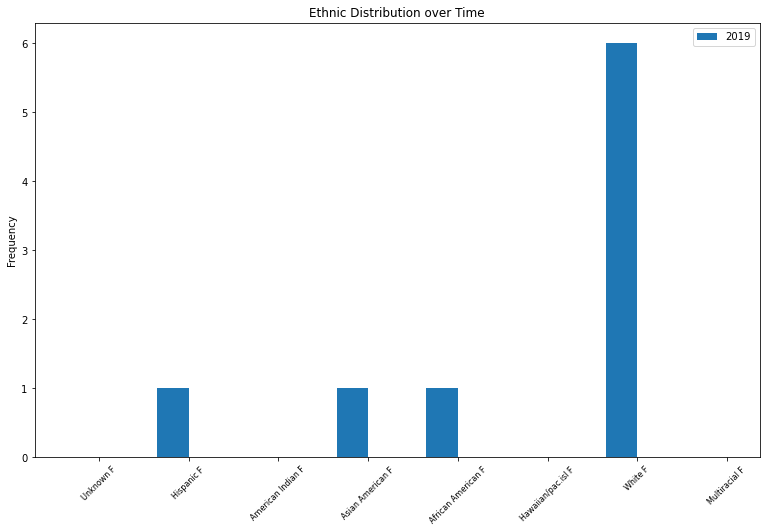

In [16]:
form